# iTunes Exploratory Data Analysis

Importing libraries/modules:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Read txt/csv file with the information from my Itunes library:

In [2]:
df = pd.read_csv('Music20180927.txt', sep='\t')

In [3]:
df.shape

(21725, 31)

In [4]:
df.columns

Index(['Name', 'Artist', 'Composer', 'Album', 'Grouping', 'Work',
       'Movement Number', 'Movement Count', 'Movement Name', 'Genre', 'Size',
       'Time', 'Disc Number', 'Disc Count', 'Track Number', 'Track Count',
       'Year', 'Date Modified', 'Date Added', 'Bit Rate', 'Sample Rate',
       'Volume Adjustment', 'Kind', 'Equaliser', 'Comments', 'Plays',
       'Last Played', 'Skips', 'Last Skipped', 'My Rating', 'Location'],
      dtype='object')

---

Some basic information

In [5]:
## Number of different Artists
print('Number of different artists: ')
print(df.Artist.value_counts().shape[0])
print('Number of different named songs: ')
print(df.Name.value_counts().shape[0])
print('Number of albums: ')
print(df.Album.value_counts().shape[0])

Number of different artists: 
2245
Number of different named songs: 
20166
Number of albums: 
2584


---

### Who do I listen to the most?

My most listened to artists since 2008:

In [6]:
df.groupby('Artist')['Plays'].sum().sort_values(ascending=False).head(10)

Artist
Kanye West        6394.0
Drake             5212.0
Eminem            3737.0
Lil Wayne         3437.0
Dr. Dre           2409.0
Kendrick Lamar    2144.0
Future            1993.0
KiD CuDi          1965.0
Young Thug        1869.0
J. Cole           1791.0
Name: Plays, dtype: float64

---

### When did I add my music?

Lets explore the "Date Added" column a bit further:

In [7]:
df['date'] = pd.to_datetime(df['Date Added'])

In [8]:
import datetime as dt

In [9]:
df['year added'] = df.date.dt.year

Number of songs added each year since 2008:

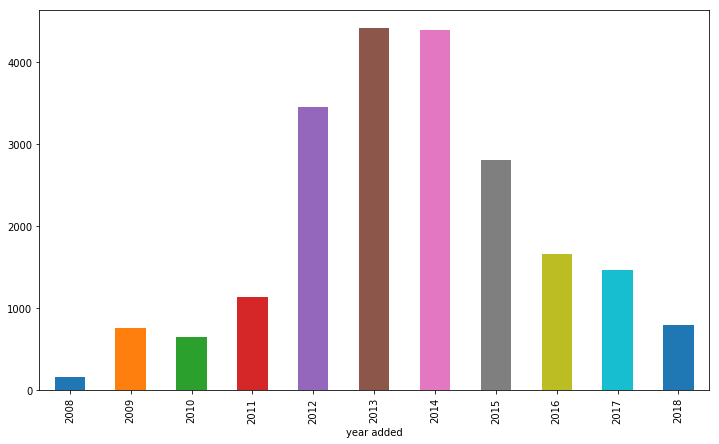

In [10]:
df.groupby('year added')['Name'].count().plot(kind='bar', figsize=(12,7));

How many songs by each artist?

In [11]:
df.groupby('Artist')['Name'].count().sort_values(ascending=False).head(20)

Artist
Lil Wayne           769
Kanye West          478
Max B               406
Drake               372
Young Thug          363
Eminem              307
The Beatles         238
Future              226
Jay-Z               223
50 Cent             212
Rick Ross           203
The Game            199
Gucci Mane          195
Lupe Fiasco         184
Big K.R.I.T.        161
T.I.                151
Kendrick Lamar      149
KiD CuDi            146
Childish Gambino    141
Young Jeezy         140
Name: Name, dtype: int64

Any albums that take too much space?

In [12]:
df.groupby('Album')['Size'].sum().sort_values(ascending=False).head(20)

Album
Beats To Die For                                4536173070
Las 100 canciones mas Rolling de la historia     796668246
Lil Wayne: Features 2008                         738100105
Lil Wayne: Features 2009                         610656625
Lil Wayne: Features 2007                         442395387
Young Thug: Unreleased 2013/14                   437894388
The Very Best Of Magic Elton John                422766718
Trilogy                                          384985237
Drake: Unreleased                                373790389
Lil Wayne: Unreleased 2009-2010                  370065413
Pre-CD                                           369917893
The Very Best Of Julio                           364981223
Lil Wayne: Features 2011                         350403395
Drake: Unreleased 2008 - 2010                    333568798
All Eyez On Me                                   319427902
Young Thug: Unreleased 2015                      317240905
Kendrick Lamar: Unreleased                       3

Most prominent artists?

In [13]:
df.groupby('Artist')['Size'].sum().sort_values(ascending=False).head(20)

Artist
Lil Wayne         5397803194
Kanye West        3536349402
Eminem            2652024132
Drake             2625875364
Young Thug        2518144010
Jay-Z             2072159130
Max B             1851016635
Rick Ross         1828655981
The Game          1681830802
Lupe Fiasco       1666063347
Future            1662648520
50 Cent           1588213462
The Weeknd        1421696212
T.I.              1303741183
Kendrick Lamar    1272798074
Gucci Mane        1254794022
Big K.R.I.T.      1228719661
J. Cole           1127844091
The Beatles       1120364689
Lana Del Rey      1107195096
Name: Size, dtype: int64

---

### Identifying most skipped artists

First let's take a look at number of plays vs storage size, trying to identify artists that take too much HD storage:

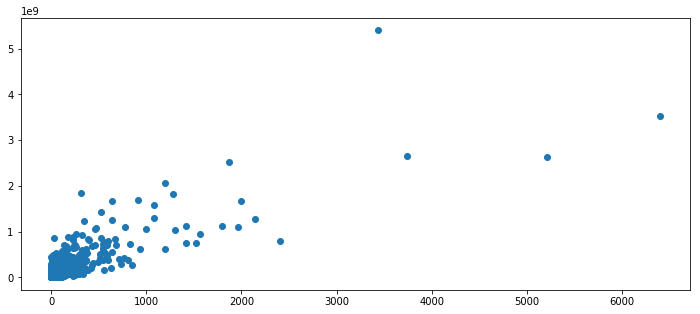

In [14]:
plt.subplots(figsize=(12,5))
plt.scatter(df.groupby('Artist')['Plays'].sum(), df.groupby('Artist')['Size'].sum())
plt.show()

Nothing too noticeable...

Which artists do I skip the most?

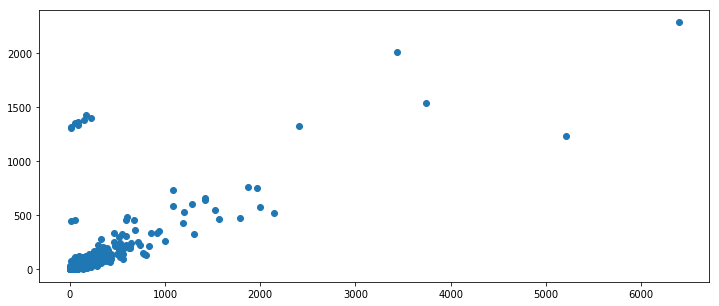

In [15]:
plt.subplots(figsize=(12,5))
plt.scatter(df.groupby('Artist')['Plays'].sum(), df.groupby('Artist')['Skips'].sum())
plt.show()

In [16]:
skipped = df.groupby('Artist')[['Skips']].sum()[df.groupby('Artist')[['Skips']].sum()['Skips']>1000][df.groupby('Artist')[['Plays']].sum()['Plays']<2000]

list(skipped.index)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


['Arctic Monkeys',
 'Bill Conti',
 'Coldplay',
 'Fito y Fitipaldis',
 'Fort Minor',
 'Real Madrid',
 'Shakira',
 'Soulja Boy']

In [17]:
art = pd.DataFrame(df.groupby('Artist')['Plays'].sum())

In [18]:
songs = []
for artist in art.index:
    songs.append(df[df['Artist']==artist]['Name'].count())
art['Songs'] = songs
    

Lets figure out the ratio between number of overall plays and number of songs by a given artist:

In [19]:
art['Ratio'] = art['Plays']/art['Songs']

In [20]:
art = art.sort_values(by='Ratio', ascending=False)
art.head()

,Plays,Songs,Ratio
Artist,,,
Billie the Vision & The Dancers,117.0,1,117.0
Madcon,97.0,1,97.0
Hilltop Hoods,77.0,1,77.0
Dispatch,75.0,1,75.0
The Triangles,65.0,1,65.0


In [21]:
for i in range(len(art.index)):
    if art.index[i] in skipped.index:
        print(art.index[i])
        print(art['Ratio'][i])

Coldplay
22.0
Bill Conti
17.0
Fort Minor
16.666666666666668
Shakira
8.789473684210526
Arctic Monkeys
8.055555555555555
Fito y Fitipaldis
5.0
Real Madrid
4.333333333333333
Soulja Boy
3.9047619047619047


These artists, although being very skippable, have high plays/songs ratios. I need to check what songs are making me skip these artists so often.

---

### Spreaded Artists

Some individual artists team up with other musical acts, so they are spread through many artist names:

In [22]:
for artist in art.index:
    if 'Young Thug' in artist:
        print(artist)

Birdman & Young Thug
Young Thug & Travi$ Scott
Young Thug
Young Thug, Rich Homie Quan & Birdman
Young Thug & Rich Homie Quan
Future & Young Thug
Young Thug & T.I.
Gucci Mane & Young Thug
Young Thug & Bloody Jay
Young Thug & Young Stoner Life Records
Young Thug & Carnage


In [23]:
for artist in art.index:
    if 'French Montana' in artist:
        print(artist)

French Montana
French Montana & Max B
French Montana & Coke Boys
French Montana & Fetty Wap
Meek Mill, Pill, Torch & Rick Ross feat. French Montana


---

### Take Action!

Number of Artists in my library I have never listened to

In [24]:
art[art['Ratio']==0].shape[0]

554

Artists I have listened to at least once, but need to relisten to see if they are worth keeping:

In [25]:
art[art['Ratio']<1][art['Ratio']>0].shape[0]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


141

In [26]:
print(list(art[art['Ratio']<1][art['Ratio']>0].index))

['The Alchemist', 'Deltron 3030', 'Zaytoven', 'Bishop Lamont', 'Ace Hood', 'Grandmaster Flash & The Furious Five', 'Mick Jenkins', 'Giggs', 'R. Kelly', 'Burial', 'Despot', 'Makaveli', 'Pink Floyd', 'A Tribe Called Quest', 'Lil Peep', 'Max B', 'Cardi B', 'King Louie', 'Slick Rick', 'Captain Beefheart & The Magic Band', 'Blu', 'Ed Sheeran', 'Foxygen', "Royce Da 5'9''", 'RL Grime', 'The Pussycat Dolls', 'Meat Loaf', 'Remy Boyz', 'Damian Marley', 'Animal Collective', 'Toto', 'Mike G', 'Nirvana', 'Nina Simone', 'The Fugees', 'Phoenix', 'CyHi The Prynce', 'Sia', 'C2C', 'TLC', 'Dom Kennedy', 'French Montana & Coke Boys', 'Do Or Die', 'Spandau Ballet', 'Pimp C', 'Chinx Drugz', 'Fat Trel', 'Sir Michael Rocks', 'Mura Masa', 'Tekitha/Wu-Tang Clan', 'Double A', 'Consequence', 'SreyLeak', 'Johnny Mathis & Deniece Williams', 'T-Pain & Lil Wayne', 'Madeintyo', 'Umberto Tozzi', 'Dej Loaf', 'Method Man', 'ROWDY REBEL FT BOBBY SHMURDA', 'The Pharcyde', 'Pill', 'Yung Berg', 'Street Military', 'Lil Bibby'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


There are a few artist that I will keep based on their critical acclaim and cultural impact, artists such as Rakim, ODB, D'Angelo, Deltron 3030 and so on. I might remove some of the non-rap bands like Phoenix or Joy Division, I don't see myself actively listening to them, so I will keep only some essential songs by them.

I think this the fastest way to start cleansing my library from unwanted music, targeting those artists that are rarely listened to.

## Next Steps

I should review Networks and try to understand how artists are linked to each other through features.